In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [14]:
df= pd.read_csv('/Users/abhineshsingh/kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr    bu   sc    sod  pot  hemo   pcv      wc   rc  htn   dm cad appet  \
0  121.0  36.0  1.2    NaN  NaN  15.4  44.0  7800.0  5.2  yes  yes  no  good   
1    NaN  18.0  0.8    NaN  NaN  11.3  38.0  6000.0  NaN   no   no  no  good   
2  423.0  53.0  1.8    NaN  NaN   9.6  31.0  7500.0  NaN   no  yes  no  poor   
3  117.0  56.0  3.8  111.0  2.5  11.2  32.0  6700.0  3.9  yes   no  no  poor   
4  106.0  26.0  1.4    NaN  NaN  11.6  35.0  7300.0  4.6   no   no  no  good   

    pe  ane classification  
0   no   no            ckd  
1   no   no            ckd  
2   no  yes            ckd  
3  yes  yes            ckd  
4   no   no            ckd

In [15]:
df.shape

(400, 26)

In [16]:
df.drop('id', axis = 1, inplace = True)

In [17]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

Renaming the coloumns names for better understanding

In [18]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  blood_urea  \
0    normal      notpresent  notpresent                 121.0        36.0   
1    normal      notpresent  notpresent                   NaN        18.0   
2    normal      notpresent  notpresent                 423.0        53.0   
3  abnormal         present  notpresent                 117.0        56.0   
4    normal      notpresent  notpresent                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2     NaN        NaN         15.4                44.0   
1               0.8     NaN        NaN         11.3                38.0   
2               1.8     NaN        NaN          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4     NaN        NaN         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count hypertension  \
0                  7800.0                   5.2          yes   
1                  6000.0                   NaN           no   
2                  7500.0                   NaN           no   
3                  6700.0                   3.9          yes   
4                  7300.0                   4.6           no   

  diabetes_mellitus coronary_artery_disease appetite peda_edema aanemia class  
0               yes                      no     good         no      no   ckd  
1                no                      no     good         no      no   ckd  
2               yes                      no     poor         no     yes   ckd  
3                no                      no     poor        yes     yes   ckd  
4                no                      no     good         no      no   ckd

In [19]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  packed_cell_volume  white_blood_cell_count  \
count  312.000000   348.000000          329.000000              294.000000   
mean     4.627244    12.526437           38.884498             8406.122449   
std      3.193904     2.912587            8.990105             2944.474190   
min      2.500000     3.100000            9.000000             2200.000000   
25%      3.800000    10.300000           32.000000             6500.000000   
50%      4.400000    12.650000           40.000000             8000.000000   
75%      4.900000    15.000000           45.000000             9800.000000   
max     47.000000    17.800000           54.000000            26400.000000   

       red_blood_cell_count  
count            269.000000  
mean               4.707435  
std                1.025323  
min                2.100000  
25%                3.900000  
50%                4.800000  
75%                5.400000  
max                8.000000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [21]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

We have the above columns in float64 to we are converting them to int

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [23]:
#code to seprate numeric and categorical columns and store in DF.
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [24]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [25]:
#Code's to replace all unwanted and wrong row data to expected metadata..
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [26]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [27]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



# Uni- variate Analysis

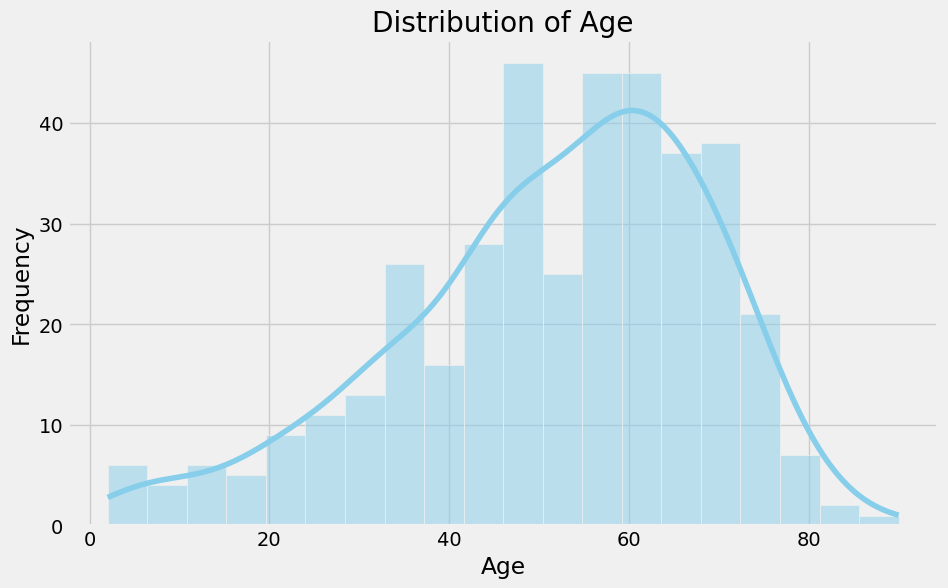

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


* The distribution of age is right-skewed, meaning there are more people on the younger side. The median age is likely lower than the mean.
* There is a clear peak in the distribution around 20-30 years old.
* The median age is approximately 40 years old.
* There is a relatively small number of people in the 70-80 age group.

**Question 1: What is the average or typical age in the data set?**

Answer: While the histogram doesn't provide the exact average (mean) directly, students can look at the shape of the distribution. A symmetrical bell-shaped curve suggests the average is likely near the center of the distribution, where the peak is.

**Question 2: How spread out are the ages in the data set? Is there a wider range of younger or older ages?**

Answer: By looking at the histogram, students can see if the distribution is wider on one side than the other. A wider spread on the right side indicates more data points towards older ages, while a wider spread on the left side indicates more data points towards younger ages.

**Question 3: Are there any outliers in the data (ages that fall far outside the majority of the data points)?**

Answer: Histograms can reveal potential outliers as data points far away from the main distribution. Students can see if there are any bars at the very edges of the histogram that are isolated from the rest of the data. These could be outliers.

In [29]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

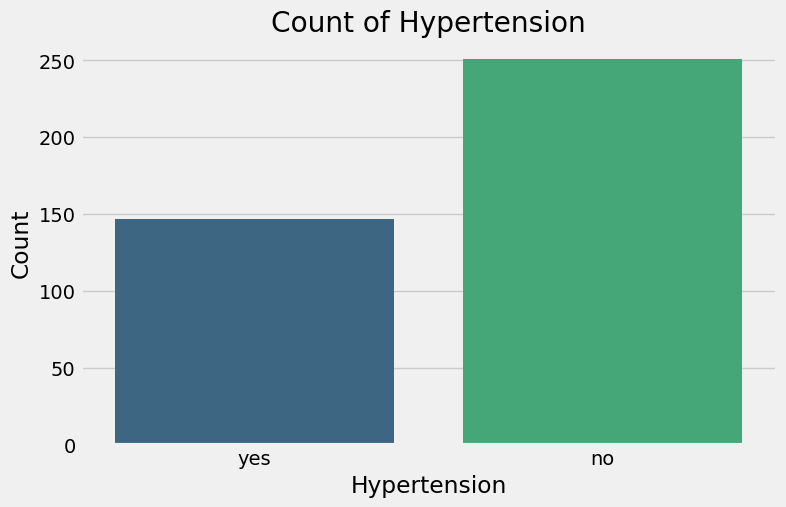

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='hypertension', data=df, palette='viridis')
plt.title('Count of Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()


Based on above graph we can say. almost 150 of them are with hyper tension. and compare to yes the bar graph No is high. means we can see people with No hyper tension are more

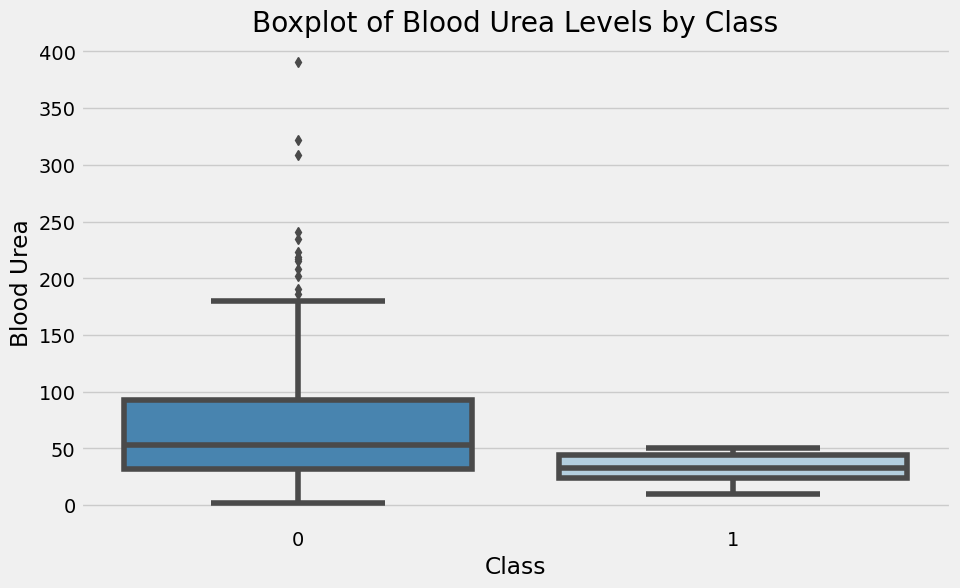

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='blood_urea', data=df, palette='Blues_r')
plt.title('Boxplot of Blood Urea Levels by Class')
plt.xlabel('Class')
plt.ylabel('Blood Urea')
plt.show()


**Question 4: Are there any outliers in the blood urea levels for any particular class?**

Answer: Students can look for data points plotted as individual circles above or below the whiskers of the boxplots. These are potential outliers, which are data points that fall far outside the IQR.

**Question 5: Are there any significant differences in the median blood urea levels between the different classes?**

Answer: By comparing the medians (the lines in the middle of the IQR boxes) across the classes, students can see if there are any classes with particularly high or low median blood urea levels. They can also consider if the notches on the ends of the whiskers overlap. Non-overlapping notches can be an indication that the medians are statistically different.

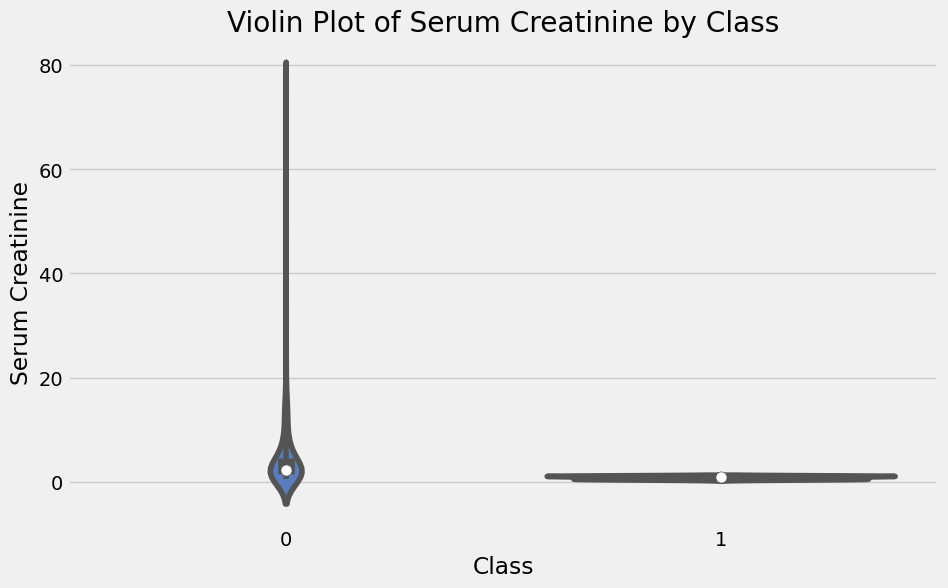

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='serum_creatinine', data=df, palette='muted')
plt.title('Violin Plot of Serum Creatinine by Class')
plt.xlabel('Class')
plt.ylabel('Serum Creatinine')
plt.show()


**Question 6: How is the distribution of serum creatinine levels shaped across the different classes? Are there any classes with a wider distribution of serum creatinine levels than others?**

Answer: By looking at the wider parts of the violin plot, students can see the distribution of serum creatinine levels within each class. The wider the violin plot, the wider the spread of data points within that class.

**Question 7: Are there any outliers in the serum creatinine levels for any particular class?**

Answer: Students can look for data points plotted as individual circles outside the main body of the violin plot. These are potential outliers, which are data points that fall far outside the rest of the data points in that class.

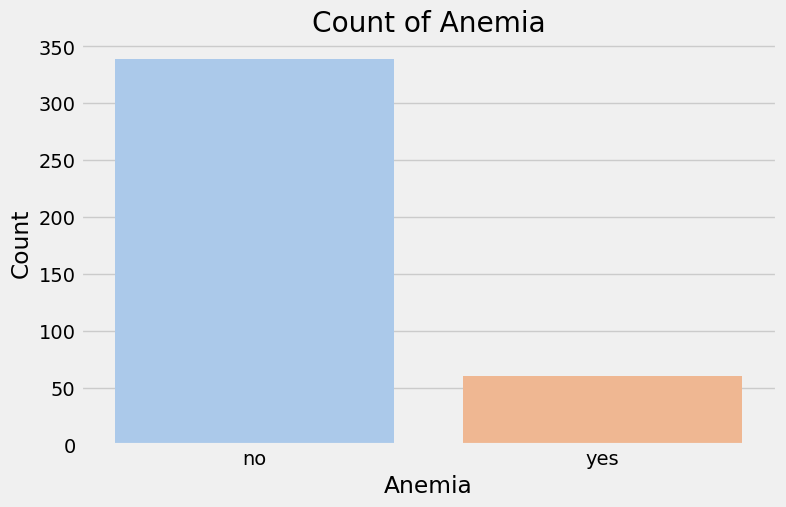

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='aanemia', data=df, palette='pastel')
plt.title('Count of Anemia')
plt.xlabel('Anemia')
plt.ylabel('Count')
plt.show()


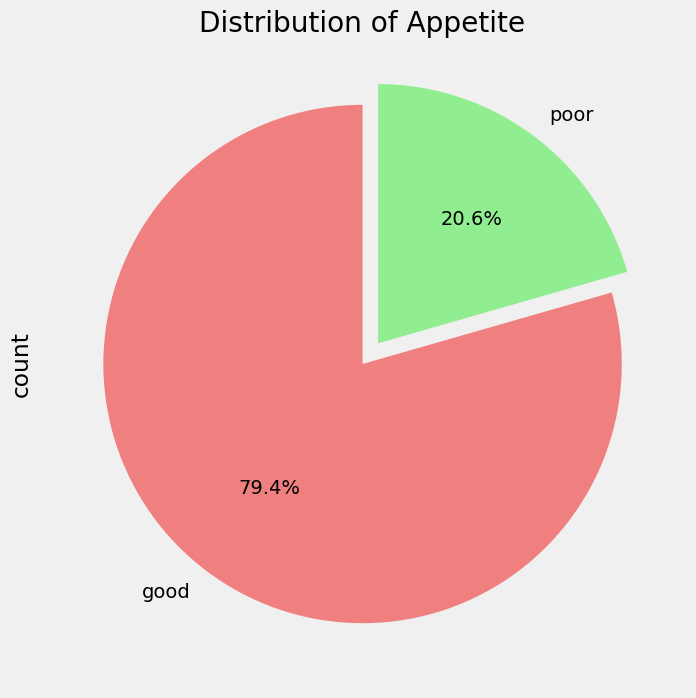

In [34]:
plt.figure(figsize=(8, 8))
df['appetite'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], explode=(0, 0.1), startangle=90)
plt.title('Distribution of Appetite')
plt.show()


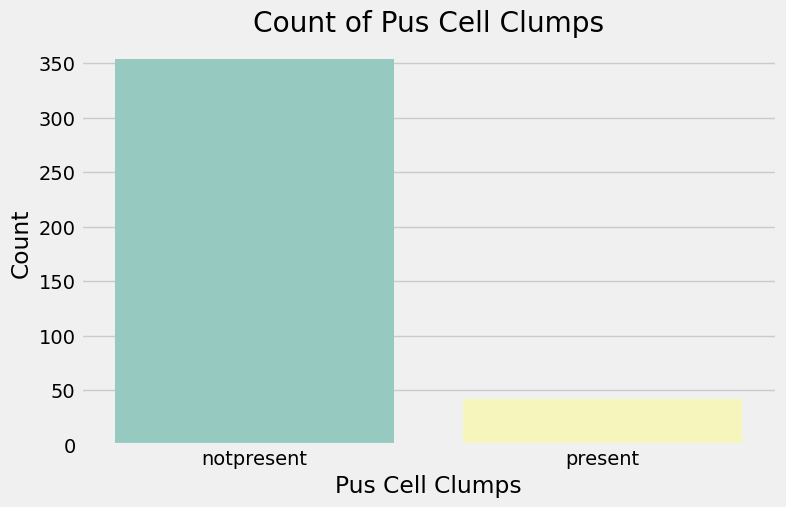

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x='pus_cell_clumps', data=df, palette='Set3')
plt.title('Count of Pus Cell Clumps')
plt.xlabel('Pus Cell Clumps')
plt.ylabel('Count')
plt.show()


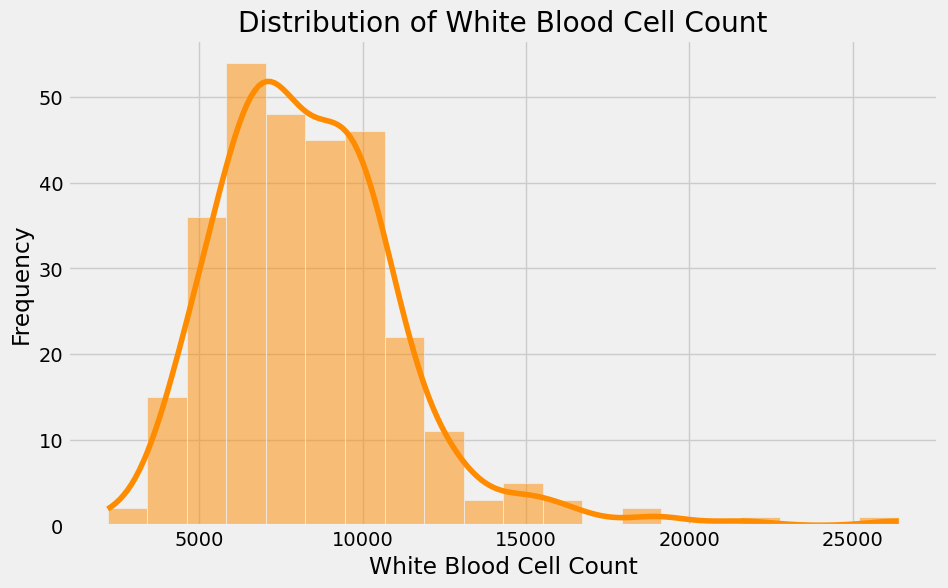

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['white_blood_cell_count'].dropna(), bins=20, color='darkorange', kde=True)
plt.title('Distribution of White Blood Cell Count')
plt.xlabel('White Blood Cell Count')
plt.ylabel('Frequency')
plt.show()


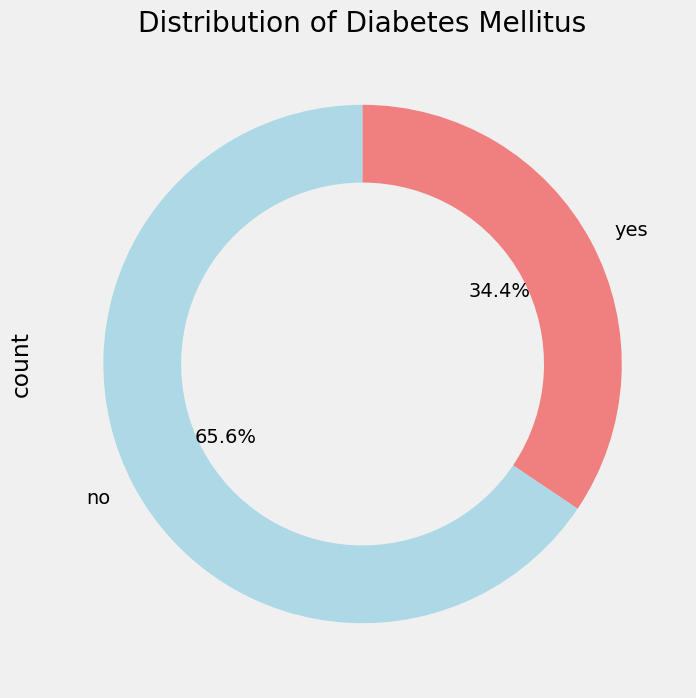

In [37]:
plt.figure(figsize=(8, 8))
df['diabetes_mellitus'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], wedgeprops=dict(width=0.3), startangle=90)
plt.title('Distribution of Diabetes Mellitus')
plt.show()


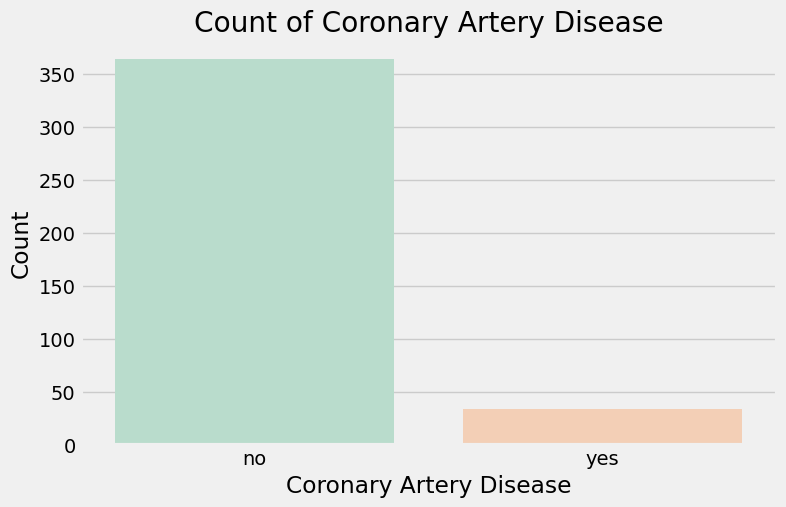

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(x='coronary_artery_disease', data=df, palette='Pastel2')
plt.title('Count of Coronary Artery Disease')
plt.xlabel('Coronary Artery Disease')
plt.ylabel('Count')
plt.show()


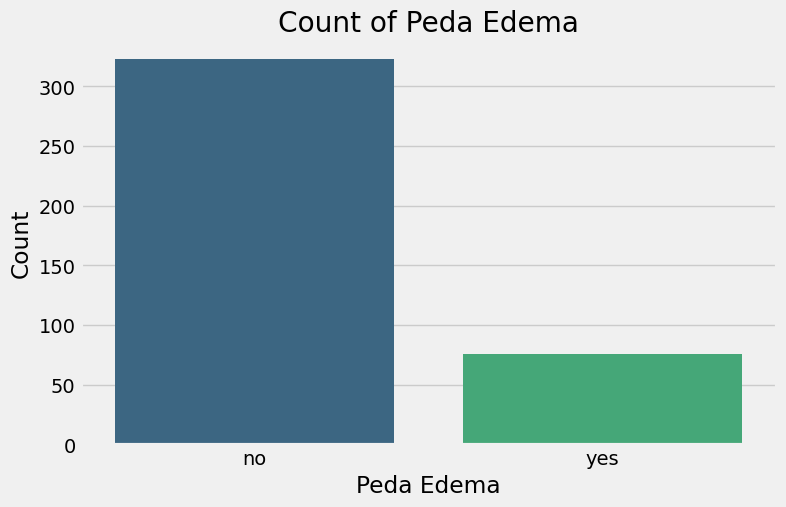

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(x='peda_edema', data=df, palette='viridis')
plt.title('Count of Peda Edema')
plt.xlabel('Peda Edema')
plt.ylabel('Count')
plt.show()


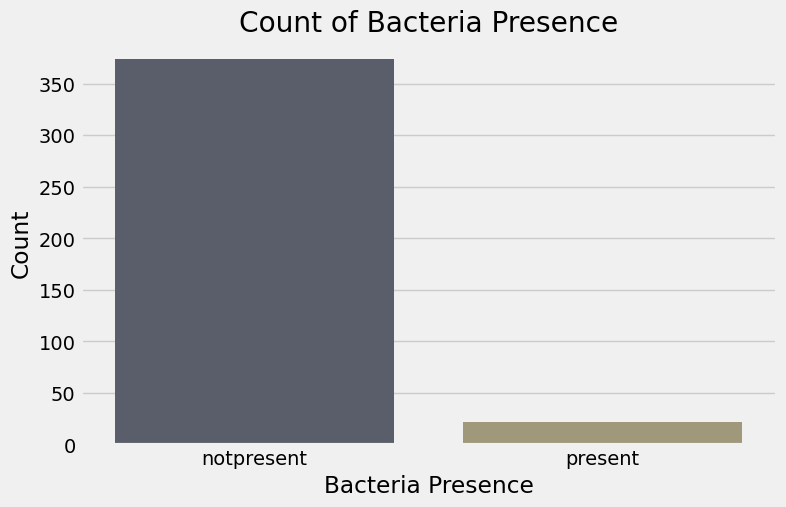

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bacteria', data=df, palette='cividis')
plt.title('Count of Bacteria Presence')
plt.xlabel('Bacteria Presence')
plt.ylabel('Count')
plt.show()


# Bivariate Analysis

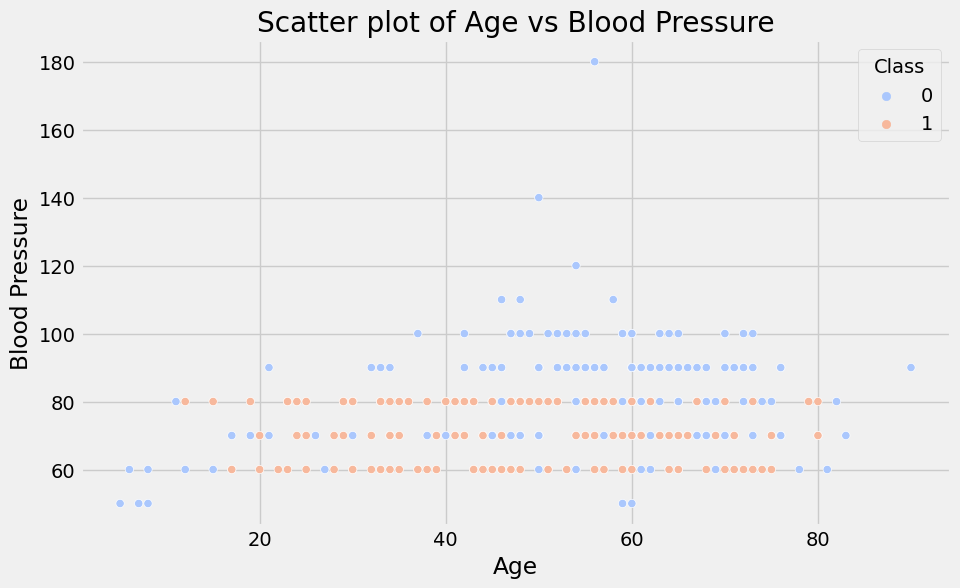

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='blood_pressure', data=df, hue='class', palette='coolwarm')
plt.title('Scatter plot of Age vs Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='Class')
plt.show()


* The graph shows the relationship between age and blood pressure in your dataset.
* There is a general trend of increasing blood pressure with age. This means that older people tend to have higher blood pressure than younger people.
* However, there is also a lot of variability in blood pressure within each age group. This means that not all older people have high blood pressure, and not all younger people have low blood pressure.

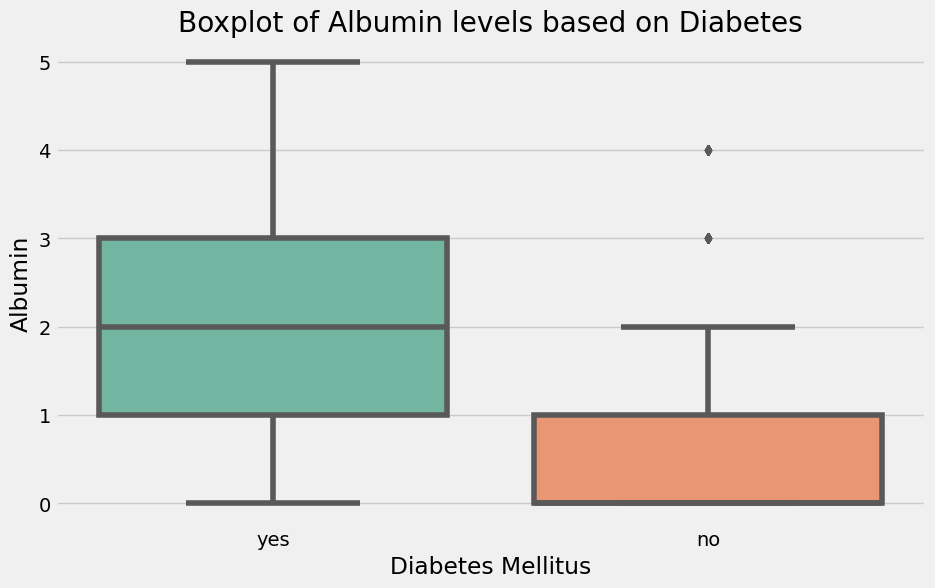

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes_mellitus', y='albumin', data=df, palette='Set2')
plt.title('Boxplot of Albumin levels based on Diabetes')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Albumin')
plt.show()


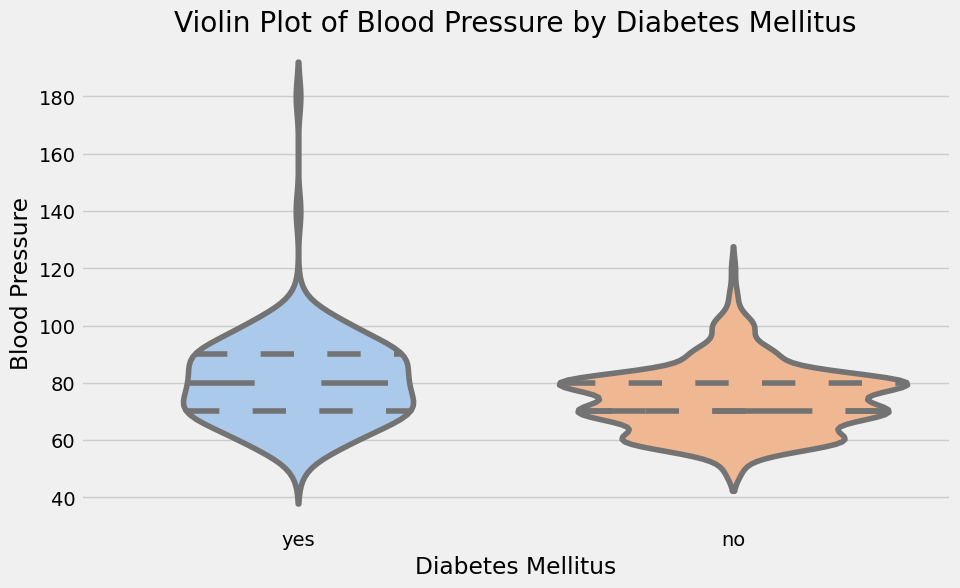

In [43]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes_mellitus', y='blood_pressure', data=df, palette='pastel', inner='quartile')
plt.title('Violin Plot of Blood Pressure by Diabetes Mellitus')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Blood Pressure')
plt.show()


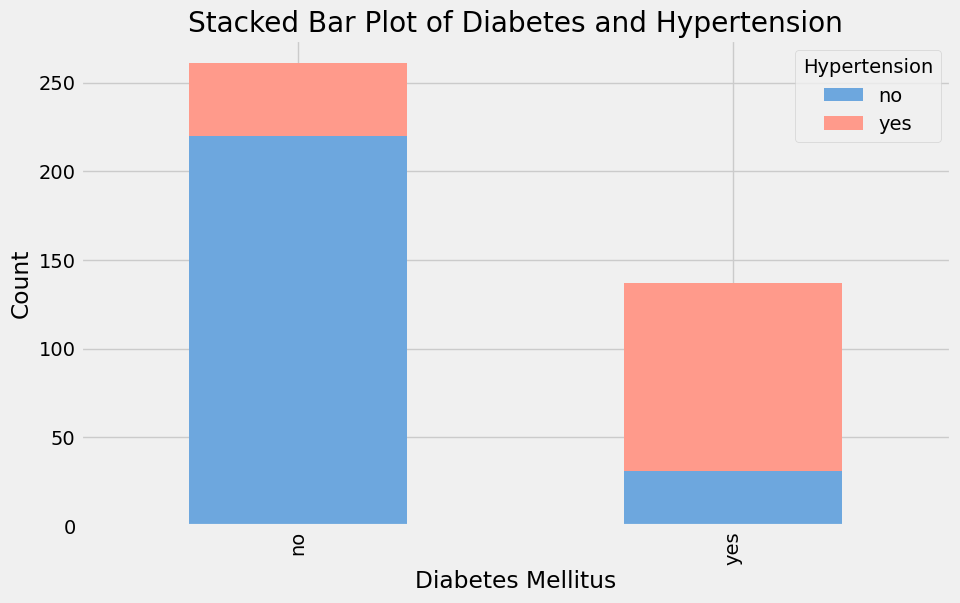

In [44]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind='bar', stacked=True, color=['#6DA7DE', '#FF9A8B'], figsize=(10, 6))
plt.title('Stacked Bar Plot of Diabetes and Hypertension')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Count')
plt.legend(title='Hypertension')
plt.show()


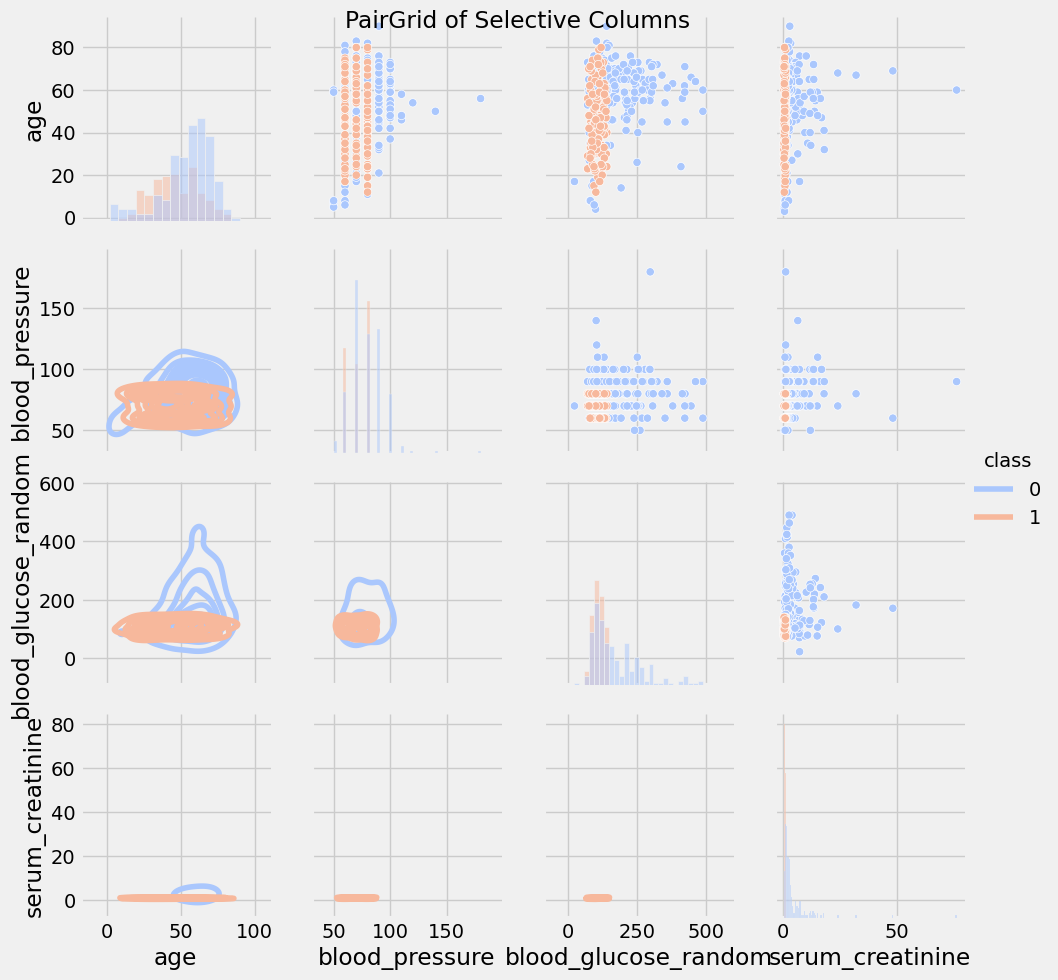

In [45]:
selected_columns_pairgrid = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
g = sns.PairGrid(df[selected_columns_pairgrid], hue='class', palette='coolwarm')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.add_legend()
plt.suptitle('PairGrid of Selective Columns')
plt.show()


# Multi variate Analysis

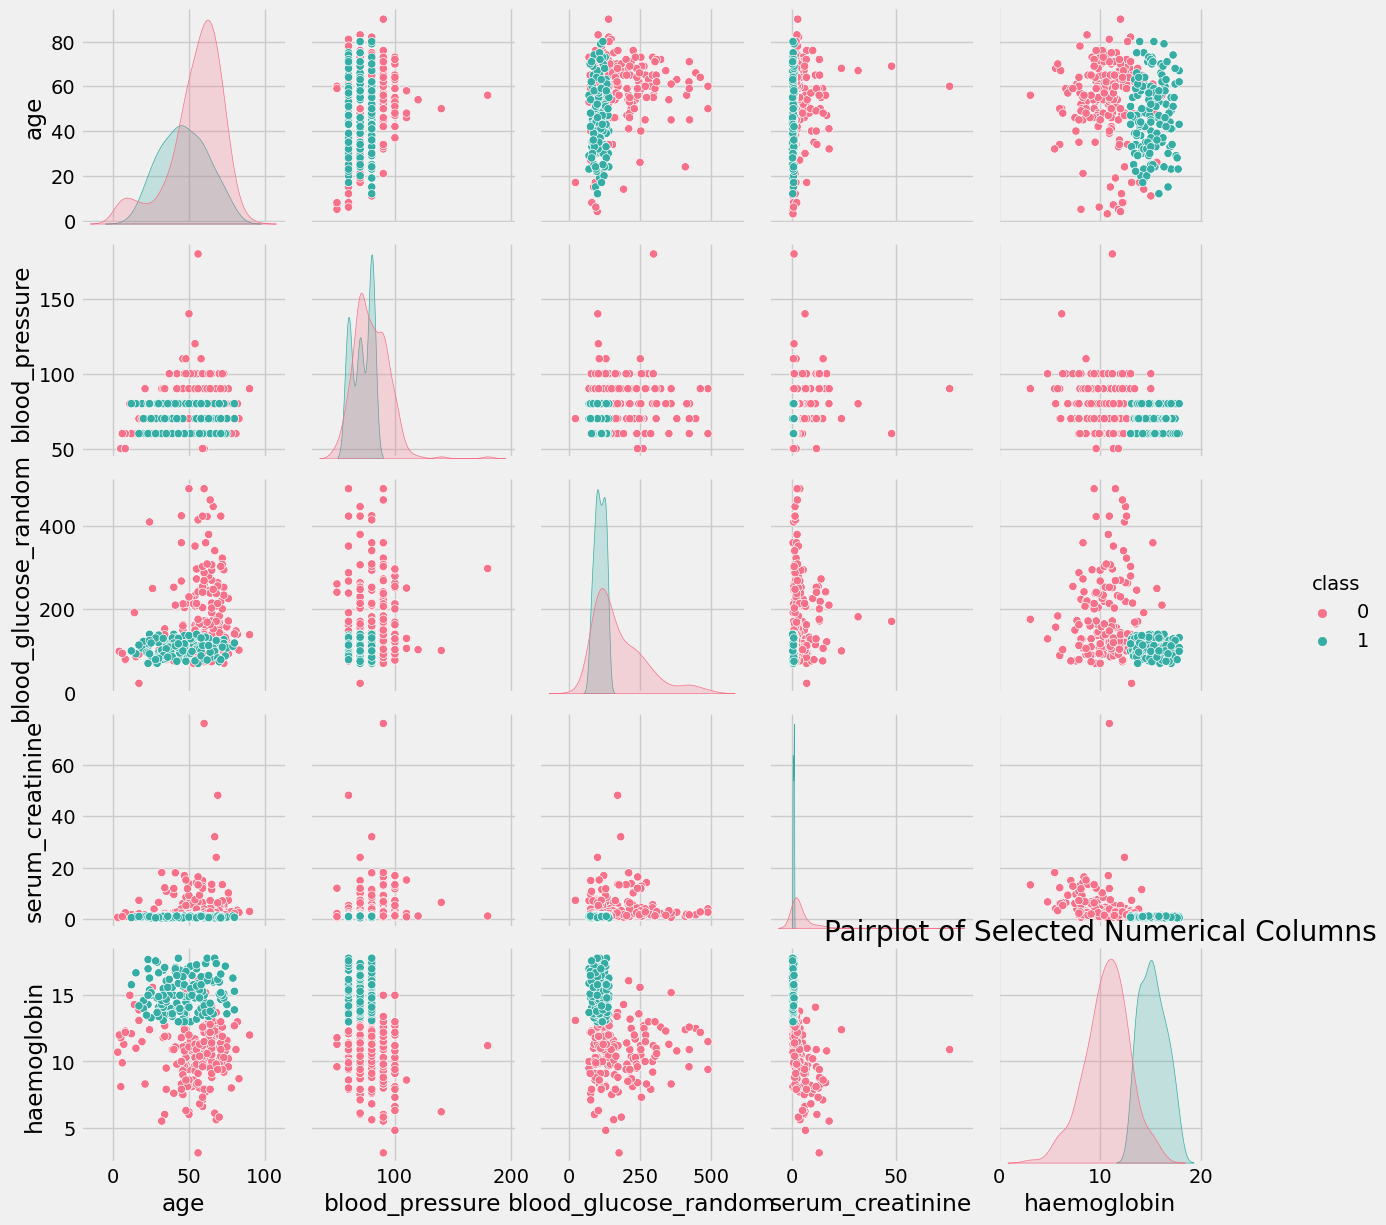

In [46]:
selected_columns = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'haemoglobin', 'class']
sns.pairplot(df[selected_columns], hue='class', palette='husl')
plt.title('Pairplot of Selected Numerical Columns')
plt.show()


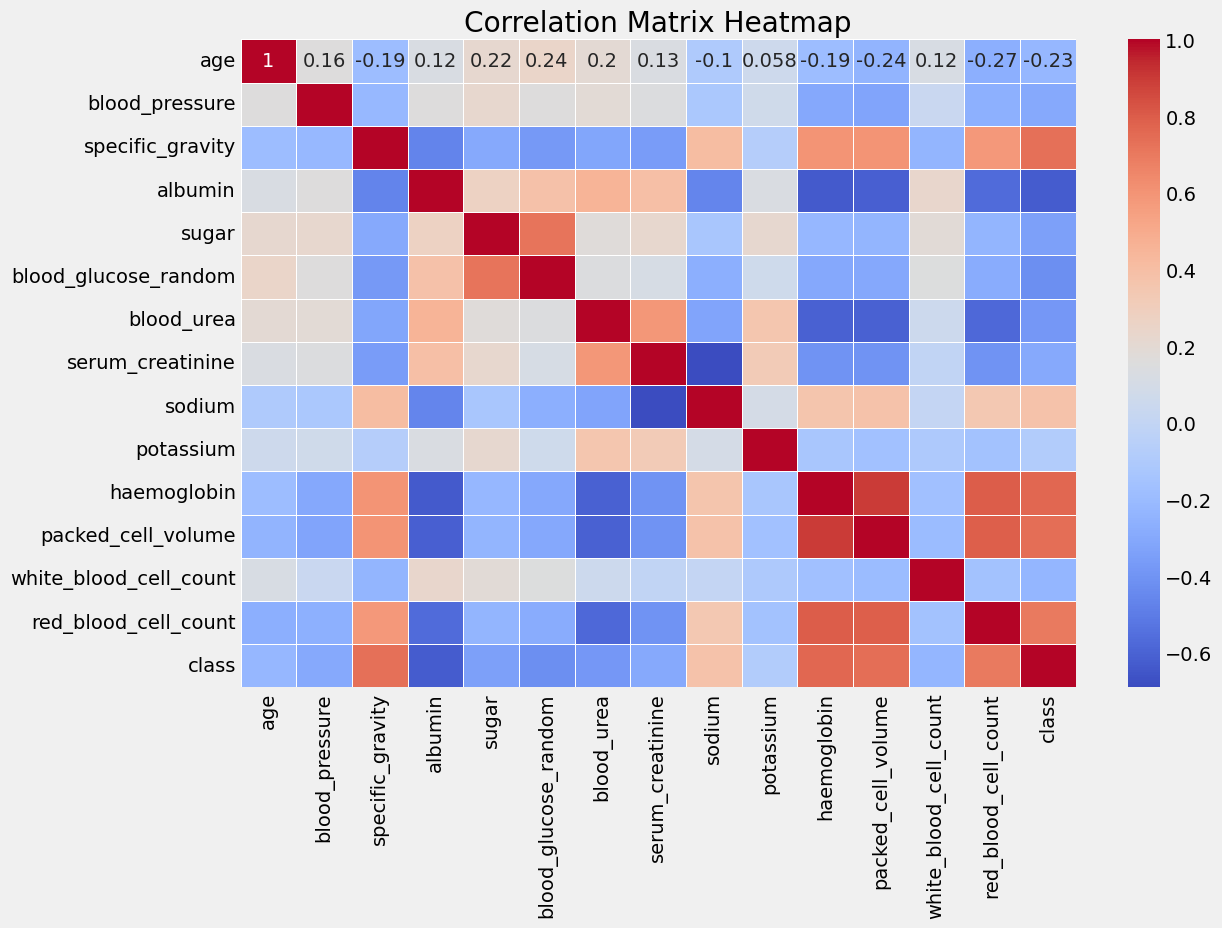

In [47]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


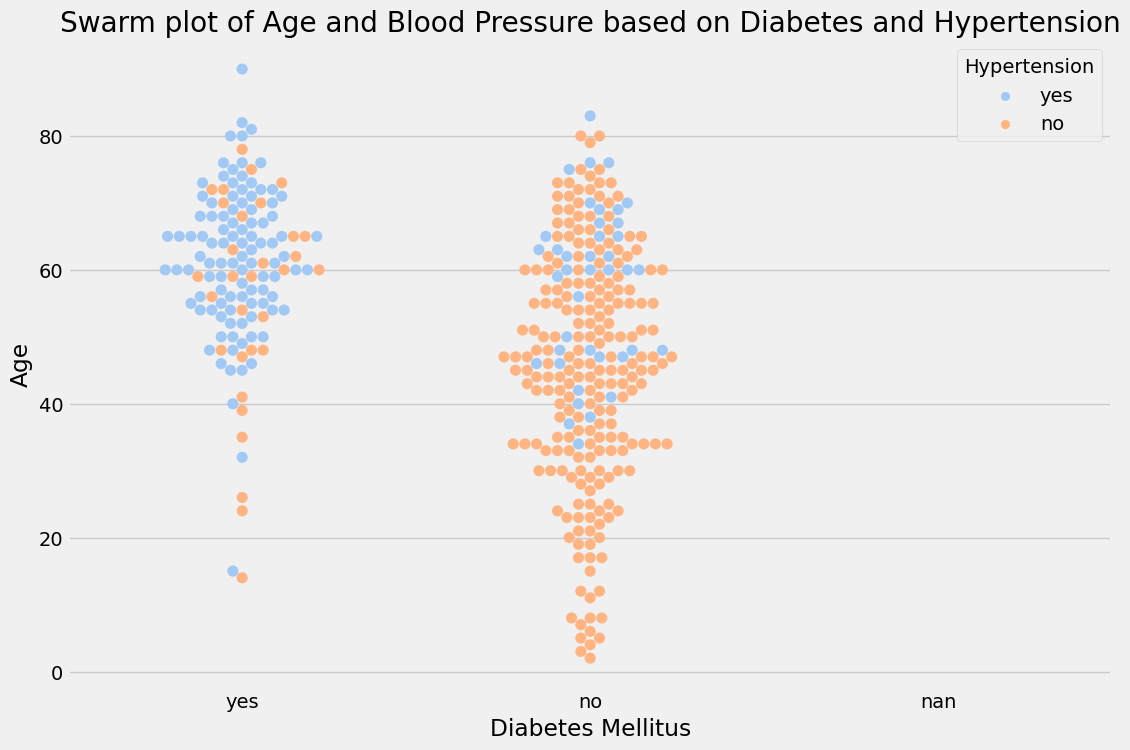

In [48]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='diabetes_mellitus', y='age', hue='hypertension', data=df, palette='pastel', size=8)
plt.title('Swarm plot of Age and Blood Pressure based on Diabetes and Hypertension')
plt.xlabel('Diabetes Mellitus')
plt.ylabel('Age')
plt.legend(title='Hypertension')
plt.show()


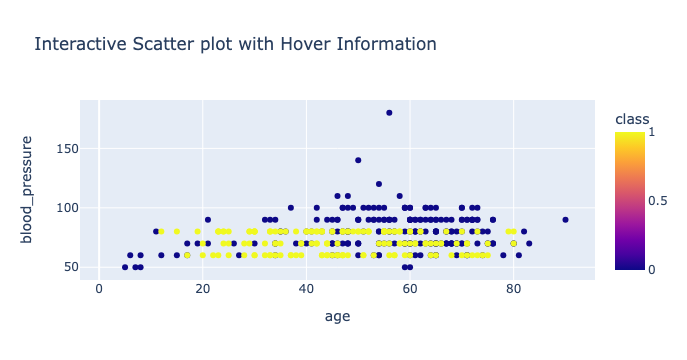

In [49]:
import plotly.express as px

fig = px.scatter(df, x='age', y='blood_pressure', color='class', hover_data=['serum_creatinine', 'haemoglobin'],
                 title='Interactive Scatter plot with Hover Information')
fig.show()


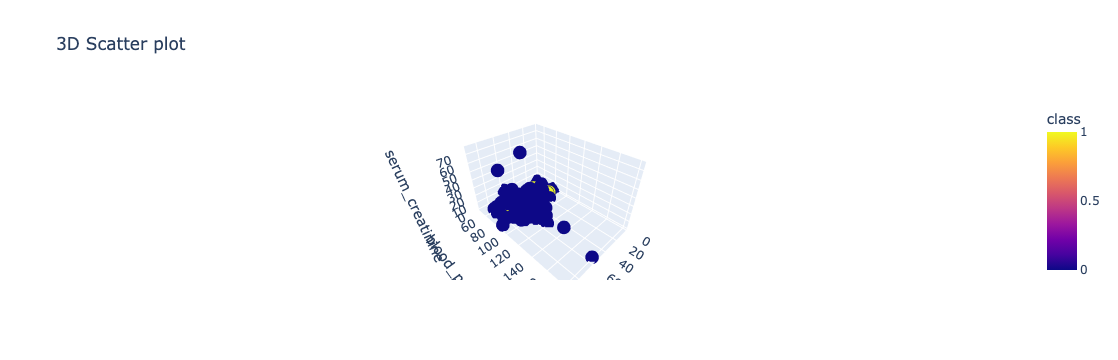

In [71]:

fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='class',
                    title='3D Scatter plot')
fig.show()


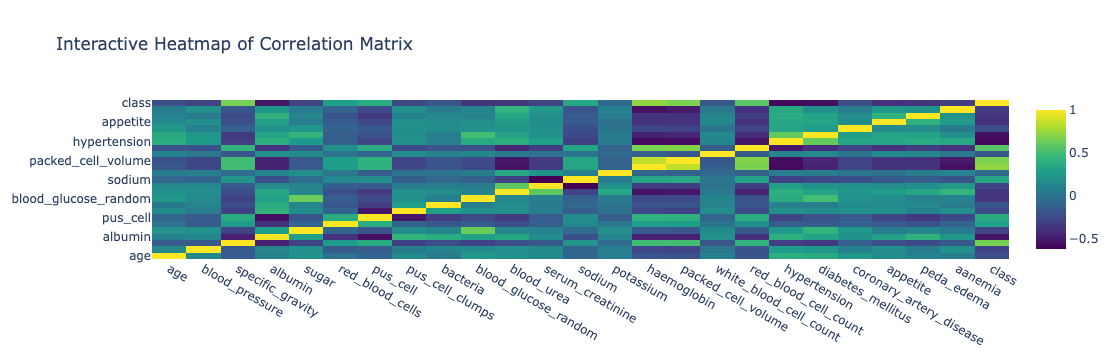

In [67]:
import plotly.graph_objects as go

heatmap_data = df.corr(numeric_only = True)

fig = go.Figure(data=go.Heatmap(z=heatmap_data.values,
                                x=heatmap_data.columns,
                                y=heatmap_data.index,
                                colorscale='Viridis'))

fig.update_layout(title='Interactive Heatmap of Correlation Matrix')
fig.show()


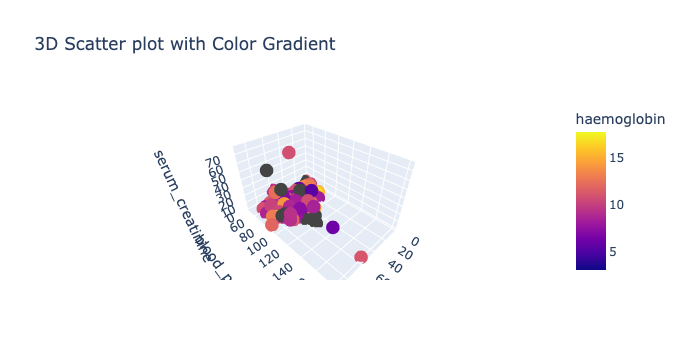

In [52]:
fig = px.scatter_3d(df, x='age', y='blood_pressure', z='serum_creatinine', color='haemoglobin',
                    title='3D Scatter plot with Color Gradient')
fig.show()


In [53]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [54]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [55]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [56]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [57]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'class']

In [58]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [59]:
# Replacing null values with medium
median_values = df[num_cols].median()
df[num_cols] = df[num_cols].fillna(median_values)

In [60]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [61]:
mode_values = df.mode().iloc[0]
df[cat_cols] = df[cat_cols].fillna(mode_values)

In [62]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

## Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

for col in cat_cols:
    df[col] = LabelEncoder.fit_transform(df[col])

In [64]:
df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  blood_urea  \
0         1                0         0                 121.0        36.0   
1         1                0         0                 121.0        18.0   
2         1                0         0                 423.0        53.0   
3         0                1         0                 117.0        56.0   
4         1                0         0                 106.0        26.0   

   serum_creatinine  sodium  potassium  haemoglobin  packed_cell_volume  \
0               1.2   138.0        4.4         15.4                44.0   
1               0.8   138.0        4.4         11.3                38.0   
2               1.8   138.0        4.4          9.6                31.0   
3               3.8   111.0        2.5         11.2                32.0   
4               1.4   138.0        4.4         11.6                35.0   

   white_blood_cell_count  red_blood_cell_count  hypertension  \
0                  7800.0                   5.2             1   
1                  6000.0                   4.8             0   
2                  7500.0                   4.8             0   
3                  6700.0                   3.9             1   
4                  7300.0                   4.6             0   

   diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  aanemia  \
0                  1                        0         0           0        0   
1                  0                        0         0           0        0   
2                  1                        0         1           0        1   
3                  0                        0         1           1        1   
4                  0                        0         0           0        0   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

In [65]:
##X, y, train test split, scaling and model building